In [1]:
import pandas as pd
import numpy as np
import os
os.chdir("E://python")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('Train_mp.csv')

In [3]:
train.head()

,Freq_Of_Word_1,Freq_Of_Word_2,Freq_Of_Word_3,Freq_Of_Word_4,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_8,Freq_Of_Word_9,Freq_Of_Word_10,...,Freq_Of_Word_45,Freq_Of_Word_46,Freq_Of_Word_47,Freq_Of_Word_48,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,IsGoodNews
0,-0.351864,2.620660,1.253645,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,0.079303,0.157385,-0.028751,-0.046474,0.222453,1
1,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,3.837751,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.195476,-0.408024,0
2,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,-0.453742,-0.107383,-0.187634,-0.392578,0
3,1.210190,2.682528,1.291868,-0.039223,0.221744,-0.353977,-0.304257,0.859101,-0.318797,2.374782,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.340723,1.334201,2.270899,0.602985,1
4,-0.351864,-0.318036,-0.561952,-0.039223,-0.465210,-0.353977,-0.304257,-0.240708,-0.318797,-0.352968,...,-0.323019,-0.205212,-0.079531,-0.118688,-0.151911,0.930461,-0.028751,-0.113133,-0.128592,0


In [4]:
test = pd.read_csv("Test_mp.csv")

In [5]:
np.unique(train['IsGoodNews'],return_counts=True)

(array([0, 1], dtype=int64), array([579, 368], dtype=int64))

In [6]:
X = train.drop(['IsGoodNews'],axis=1)
y = train['IsGoodNews']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from imblearn.over_sampling import RandomOverSampler

In [9]:
os = RandomOverSampler(1)

In [10]:
X_train_reshape,y_train_reshape = os.fit_sample(X,y)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_train_reshape,y_train_reshape,test_size=0.2,random_state=1)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logi = LogisticRegression()

In [14]:
logi.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
logi_pred = logi.predict(X_test)

In [16]:
from sklearn import metrics as m

In [17]:
m.accuracy_score(y_test,logi.predict(X_test))

0.9051724137931034

In [18]:
import xgboost

In [19]:
xgb = xgboost.XGBClassifier()

In [20]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [21]:
xgb_pred = xgb.predict(X_test)

In [22]:
m.accuracy_score(y_test,xgb.predict(X_test))

0.9310344827586207

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
gb = GaussianNB()

In [25]:
gb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
gb_pred = gb.predict(X_test)

In [27]:
m.accuracy_score(y_test,gb.predict(X_test))

0.8146551724137931

In [28]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
cm = confusion_matrix(y_test,logi.predict(X_test))

In [31]:
cm

array([[109,  15],
       [  7, 101]], dtype=int64)

In [32]:
import seaborn as sns

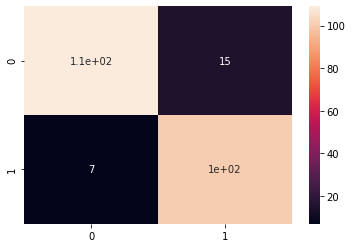

In [33]:
sns.heatmap(cm,annot=True)

In [34]:
print(classification_report(y_test,logi.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       124
           1       0.87      0.94      0.90       108

    accuracy                           0.91       232
   macro avg       0.91      0.91      0.91       232
weighted avg       0.91      0.91      0.91       232



In [35]:
print(classification_report(y_test,xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       124
           1       0.88      0.98      0.93       108

    accuracy                           0.93       232
   macro avg       0.93      0.93      0.93       232
weighted avg       0.94      0.93      0.93       232



In [36]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [44]:
import lightgbm
from lightgbm import LGBMClassifier

In [59]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score,GridSearchCV

In [57]:
models = []
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
#models.append(('BG'BaggingClassifier(base_estimator=SVC(gamma='auto'),n_features=5,n_informative=2)))
models.append(('LR',LogisticRegression()))
models.append(('KN',KNeighborsClassifier()))
models.append(('DA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('XGB',XGBClassifier()))
#models.append(('LGB'LGBMClassifier()))

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
results = []
results1 = []
names = []
scoring = 'recall'
seed = 5
for name, model in models:
    kfold = KFold(n_splits=5,random_state=seed)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(names)
    msg = (name,cv_results.mean(),cv_results.std())
    msg2 = (name,cv_results)
    print(msg)
    print(msg2)

('DT', 0.93065531224292, 0.015787961977423416)
('DT', array([0.92783505, 0.93939394, 0.94252874, 0.9009901 , 0.94252874]))
('RF', 0.943612470027664, 0.025823216186437584)
('RF', array([0.92783505, 0.96969697, 0.96551724, 0.9009901 , 0.95402299]))
('LR', 0.9106382874334358, 0.008886825941139738)
('LR', array([0.90721649, 0.90909091, 0.91954023, 0.92079208, 0.89655172]))
('KN', 0.8266362718746102, 0.05050505285990399)
('KN', array([0.83505155, 0.88888889, 0.8045977 , 0.74257426, 0.86206897]))
('DA', 0.8295173989492799, 0.03513616439664894)
('DA', array([0.81443299, 0.8989899 , 0.81609195, 0.8019802 , 0.81609195]))
('NB', 0.9543973878368996, 0.023525432900489047)
('NB', array([0.96907216, 0.94949495, 0.97701149, 0.91089109, 0.96551724]))
('SVM', 0.886153919337899, 0.02262458873917149)
('SVM', array([0.88659794, 0.84848485, 0.88505747, 0.89108911, 0.91954023]))
('XGB', 0.9389331112279375, 0.022053013513628122)
('XGB', array([0.91752577, 0.96969697, 0.94252874, 0.91089109, 0.95402299]))


In [71]:
predictions = xgb.predict(test)

In [72]:
result = pd.DataFrame(predictions,columns=['IsGoodNews'])
result

,IsGoodNews
0,0
1,0
2,0
3,1
4,0
...,...
522,0
523,1
524,0
525,0


In [73]:
np.unique(result.IsGoodNews,return_counts=True)

(array([0, 1], dtype=int64), array([319, 208], dtype=int64))